In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import altair as alt
import plotly.graph_objs as go

plt.rcParams['font.family'] = "serif"

# Load dataset into Pandas DataFrame

Tomamos una muestra de los 700 elementos del dataset de train que permitiran medir el desempeño de los algoritmos del estado del arte

In [24]:
#Los cargamos en un dataframe
path_train="C:/Users/Esperanza/Desktop/UOC/TFM/jigsaw-unintended-bias-in-toxicity-classification/train.csv"
#path_train="../../jigsaw-unintended-bias-in-toxicity-classification/train_split01.csv"
path_test="C:/Users/Esperanza/Desktop/UOC/TFM/jigsaw-unintended-bias-in-toxicity-classification/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
# Veamos los dos primeros del dataframe de train
df_train.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [3]:
print('Dimensiones del dataset de entrenamiento %d ' % len(df_train))
print('Columnas del archivo de entrenamiento: %s' % df_train.columns)

Dimensiones del dataset de entrenamiento 387 
Columnas del archivo de entrenamiento: Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')


In [4]:
df_train.shape[0]

387

In [5]:
# Contamos cuantos valores nulos hay 
df_train_res = df_train.isnull().sum()/len(df_train)
df_train_res[df_train_res>0]
#df_test.isna().sum(),df_train.isna().sum()

asian                                  0.850129
atheist                                0.850129
bisexual                               0.850129
black                                  0.850129
buddhist                               0.850129
christian                              0.850129
female                                 0.850129
heterosexual                           0.850129
hindu                                  0.850129
homosexual_gay_or_lesbian              0.850129
intellectual_or_learning_disability    0.850129
jewish                                 0.850129
latino                                 0.850129
male                                   0.850129
muslim                                 0.850129
other_disability                       0.850129
other_gender                           0.850129
other_race_or_ethnicity                0.850129
other_religion                         0.850129
other_sexual_orientation               0.850129
physical_disability                    0

In [6]:
# Valores nulos en porcentaje con cada uno de los dataset
res=df_train_res[df_train_res>0]*100 
res

asian                                  85.012920
atheist                                85.012920
bisexual                               85.012920
black                                  85.012920
buddhist                               85.012920
christian                              85.012920
female                                 85.012920
heterosexual                           85.012920
hindu                                  85.012920
homosexual_gay_or_lesbian              85.012920
intellectual_or_learning_disability    85.012920
jewish                                 85.012920
latino                                 85.012920
male                                   85.012920
muslim                                 85.012920
other_disability                       85.012920
other_gender                           85.012920
other_race_or_ethnicity                85.012920
other_religion                         85.012920
other_sexual_orientation               85.012920
physical_disability 

In [7]:
str(res.count())

'25'

# Análisis de la columna target del dataset.

La columna target es la que el modelo debe predecir. Este campo representa la fracción de peronas que creyeron que ese comentario era tóxico. 

In [8]:
df_train['result'] = df_train['target'].apply(lambda x: 1 if x >= 0.5 else 0)

print('Cuantos comentarios han sido comentados como negativos %d ' % len(df_train[df_train['result'] == 0]))
print('Cuantos comentarios han sido comentados como positivos %d ' % len(df_train[df_train['result'] == 1]))

Cuantos comentarios han sido comentados como negativos 366 
Cuantos comentarios han sido comentados como positivos 21 


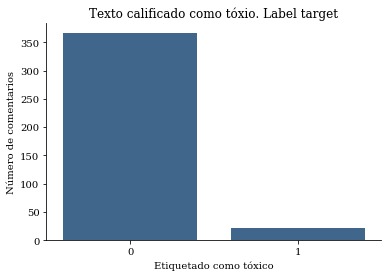

In [9]:
dy = sns.countplot(data=df_train, x = 'result', color=(0.2, 0.4, 0.6))
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Texto calificado como tóxio. Label target')
plt.xlabel('Etiquetado como tóxico')
plt.ylabel('Número de comentarios')
plt.show()

Cuales son los valores que más se han repetido

In [10]:
df_train['target'].value_counts().head(5)

0.000000    320
0.166667     18
0.200000     13
0.300000      7
0.500000      6
Name: target, dtype: int64

Calculamos el tamaño del dataset

In [11]:
print("tamaño del dataset de entrenamiento:    "+ str(df_train.shape))
print("tamaño del dataset de evaluación:       "+ str(df_test.shape))

tamaño del dataset de entrenamiento:    (387, 46)
tamaño del dataset de evaluación:       (97320, 2)


# Comentarios duplicados 

In [12]:
numero_total_elem=len(df_train['comment_text']) 
numero_unico_elem=df_train['comment_text'].nunique()
print( "Porcentaje de comentarios únicos " + str(numero_unico_elem/numero_total_elem))
print("Número de elementos repetidos  "+ str(numero_total_elem-numero_unico_elem))

Porcentaje de comentarios únicos 0.9974160206718347
Número de elementos repetidos  1


# Contar el número de palabras 

In [13]:
df_train['word_count'] = [len(x.split(" ")) for x in df_train.comment_text]
df_train[['comment_text','word_count']].head()

,comment_text,word_count
0,"This is so cool. It's like, 'would you want yo...",19
1,Thank you!! This would make my life a lot less...,22
2,This is such an urgent design problem; kudos t...,16
3,Is this something I'll be able to install on m...,17
4,haha you guys are a bunch of losers.,8


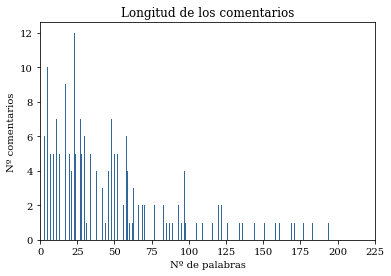

In [14]:
# Dibujamos la distribución 
plt.hist(df_train['word_count'],bins=1000 ,color=(0.2, 0.4, 0.6))
plt.title('Longitud de los comentarios')
plt.xlabel('Nº de palabras')
plt.ylabel('Nº comentarios')
plt.xlim(0, 225)
plt.show()

# ¿Está balanceado?

In [18]:
#Se define una lista con las identidades del dataset
columnas_identidad=['asian','atheist','bisexual','black','buddhist','christian',\
                    'female','heterosexual','hindu','homosexual_gay_or_lesbian',\
                    'intellectual_or_learning_disability','jewish','latino','male','muslim','other_disability',\
                    'other_gender','other_race_or_ethnicity','other_religion','other_sexual_orientation',\
                    'physical_disability','psychiatric_or_mental_illness','transgender','white']


In [19]:
#Cálculo de cuantas son en total para comprobar que no hay ninguna olvidada
len(columnas_identidad)

24

In [20]:
#Porcentaje a modo de ejemplos de los comentarios negativos dirigidos a la gente blanca 
df_train = df_train.fillna(0)
subgroup_counts = df_train.loc[(df_train['white'] != 0.0)]['target'].value_counts()
subgroup_counts[1]/subgroup_counts[0]
round(subgroup_counts[1]/subgroup_counts[0], 2)

KeyError: 1.0

In [21]:
subgroup_df = pd.DataFrame(columns = ['identity', 'toxic', 'non_toxic', 'toxic_ratio', 'percent_of_total'])               
t_counts = df_train['target'].value_counts()  
num_comments = df_train['comment_text'].size

In [22]:
#Calculamos la cantidad de veces que aparece cada una de las identidades
for idnt in columnas_identidad:
    subgroup = df_train.loc[(df_train[idnt] != 0.0)]
    subgroup_counts = df_train.loc[(df_train[idnt] != 0.0)]['target'].value_counts()      
    subgroup_dict = {'identity': idnt, 'toxic': subgroup_counts.iloc[1], 'non_toxic': subgroup_counts.iloc[0]}
    subgroup_df = subgroup_df.append(subgroup_dict, ignore_index=True)

IndexError: single positional indexer is out-of-bounds

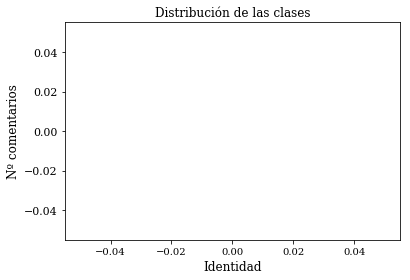

In [23]:
#Dibujamos los resultados
plt.barh(subgroup_df.identity, subgroup_df.toxic,color=(0.2, 0.4, 0.6))
plt.xlabel('Identidad', fontsize=12)
plt.ylabel('Nº comentarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.title('Distribución de las clases')
plt.show()

# Rango de fechas en el que se obtuvieron los comentarios

In [ ]:
#Vamos a dividir las identidades en los cinco grupos generales 
raza_etnia=['asian','hindu','jewish','muslim','latino','black','white','other_race_or_ethnicity']
religion=['atheist','buddhist','christian', 'other_religion']
orientacion_sexual=['bisexual','heterosexual', 'homosexual_gay_or_lesbian','other_sexual_orientation']
discapacidad=['psychiatric_or_mental_illness','intellectual_or_learning_disability','physical_disability','other_disability']
genero=['female', 'male','transgender','other_gender']


In [ ]:
#Tomamos el mismo dataset anterior pero esta vez con la columna fecha
df_fecha = df_train.loc[:, ['created_date', 'target'] + columnas_identidad].dropna()

In [ ]:
# Para cada una de las identidades podemos calcular el peso relativo 
df_peso_rel = df_fecha.loc[:, columnas_identidad]  / df_fecha.loc[:, columnas_identidad] .sum()
df_peso_rel.head(2)

In [ ]:
#Como índice vamos a indicar el valor relativo resultado de multiplicar el peso anterior con el valor total dado al comentario
df_valor_rel = df_peso_rel.multiply(df_fecha.loc[:,'target'], axis="index")
df_valor_rel.head(1)

In [ ]:
#Conversión de la fecha a datetime y extracción de la fecha sin hora
df_valor_rel['created_date'] = pd.to_datetime(df_fecha['created_date'].apply(lambda dt: dt.split(' ')[0]))
#Agrupaión del total de comentarios por día 
df_valor_rel_por_dia = df_valor_rel.groupby(['created_date']).sum()
df_valor_rel_por_dia.head(4)

In [ ]:
#Para la representación debemos ordenarlo por fecha 
df_valor_rel_por_dia=df_valor_rel_por_dia.sort_index()
df_valor_rel_por_dia.head()

In [ ]:
#Suma por cada día (por filas)
df_valor_rel_por_dia[raza_etnia].sum(axis=1).head(2)

In [ ]:
#Creamos por cada subgrupo de identidades una columna que represente la suma por cada día
df_valor_rel_por_dia['raza_etnia_suma']=df_valor_rel_por_dia[raza_etnia].sum(axis=1)
df_valor_rel_por_dia['religion_suma']=df_valor_rel_por_dia[religion].sum(axis=1)
df_valor_rel_por_dia['orientacion_sexual_suma']=df_valor_rel_por_dia[orientacion_sexual].sum(axis=1)
df_valor_rel_por_dia['discapacidad_suma']=df_valor_rel_por_dia[discapacidad].sum(axis=1)
df_valor_rel_por_dia['genero_suma']=df_valor_rel_por_dia[genero].sum(axis=1)

In [ ]:
# and then plot a time-series line plot per identity group
df_valor_rel_por_dia[['raza_etnia_suma', 'religion_suma', 'orientacion_sexual_suma',\
                      'discapacidad_suma','genero_suma']].plot(figsize=(10,7), fontsize=10) 
plt.legend(prop={'size': 12})
plt.xlabel('Comment Date', fontsize=10, color='C0')
plt.ylabel('Weighted Toxic Score', fontsize=10, color='C0')
plt.title('Distribución en el tiempo de los comentarios tóxicos por grupos', fontsize=12)
plt.show()

# Coeficiente de correlación de Pearson

In [ ]:
df_train.drop(['article_id','publication_id', 'parent_id'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)